## Functional enrichment analysis

This notebook focuses on the second main goal, i.e. explore whether or not the functional enrichment analysis yield similar results as in the paper. I will also try different functional databases to look for consensus biological targets. Another thing to test is whether or not an early version and a later version of KEGG datasets would result in different enrichment results.

In [1]:
import pickle
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import gseapy as gp
from gseapy import dotplot
from gseapy import enrichment_map

In [2]:
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
with open('../outputs/gene_list.pkl', 'rb') as f:
    gene_list = pickle.load(f)

len(gene_list)

2332

In [4]:
# Rezdiffra, the new FDA approved MASH treatment drug target is THRB, Thyroid Hormone Receptor-Beta
# "THRB" is not in the gene_list, so check what others Thyroid Hormone are there.

[i for i in gene_list if "TH" in i]

['CYTH3',
 'NTHL1',
 'MTHFD1',
 'CYTH2',
 'ETHE1',
 'THADA',
 'THEM6',
 'MTHFS',
 'THAP12',
 'THBS1',
 'THRSP',
 'PTH1R',
 'THOP1',
 'THAP7',
 'THBS2']

Out of this list, the only thing Thyroid Hormone Receptor related is probably THRSP, a Thyroid Hormone Responsive, which regulates Thyroid Hormone Receptor...

## Check functional enrichment in pathways using Enrichr API

In [5]:
# Check all available datasets to use
names = gp.get_library_name()
print(names)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and

/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


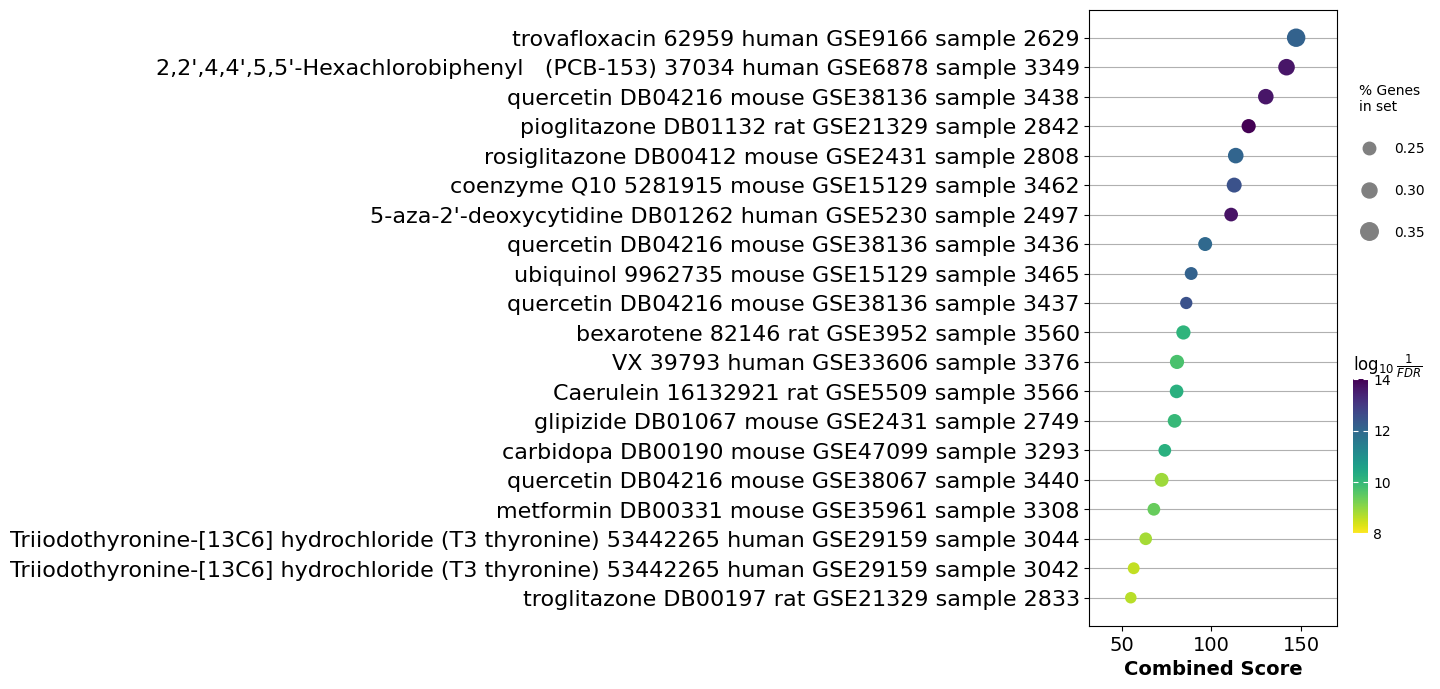

In [28]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
gene_sets = ["Drug_Perturbations_from_GEO_up"]

enr = gp.enrichr(gene_list=gene_list, 
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

# obj.results stores all results
# enr.results.head()

ax = dotplot(enr.res2d,cmap='viridis_r', size=6, figsize=(4,8), top_term=20)

### KEGG 2016 

/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


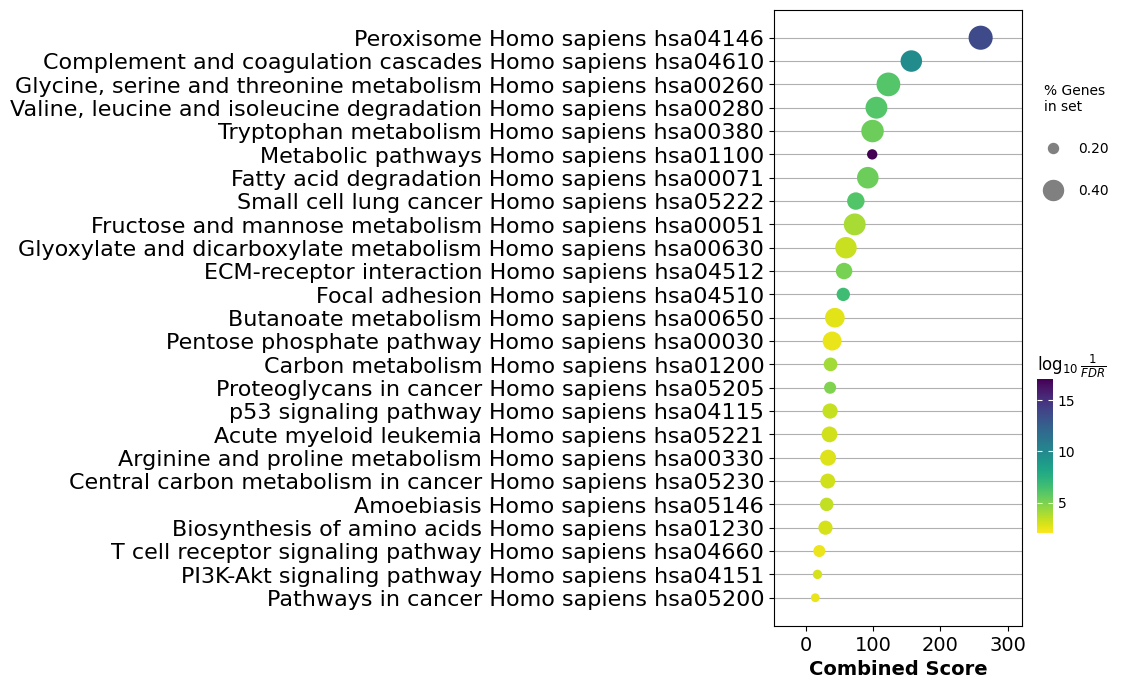

In [13]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
gene_sets = ["KEGG_2016"]

enr = gp.enrichr(gene_list=gene_list, 
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

# obj.results stores all results
# enr.results.head(20)

ax = dotplot(enr.res2d,cmap='viridis_r', size=6, figsize=(4,8), top_term=25)

### KEGG 2021

/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


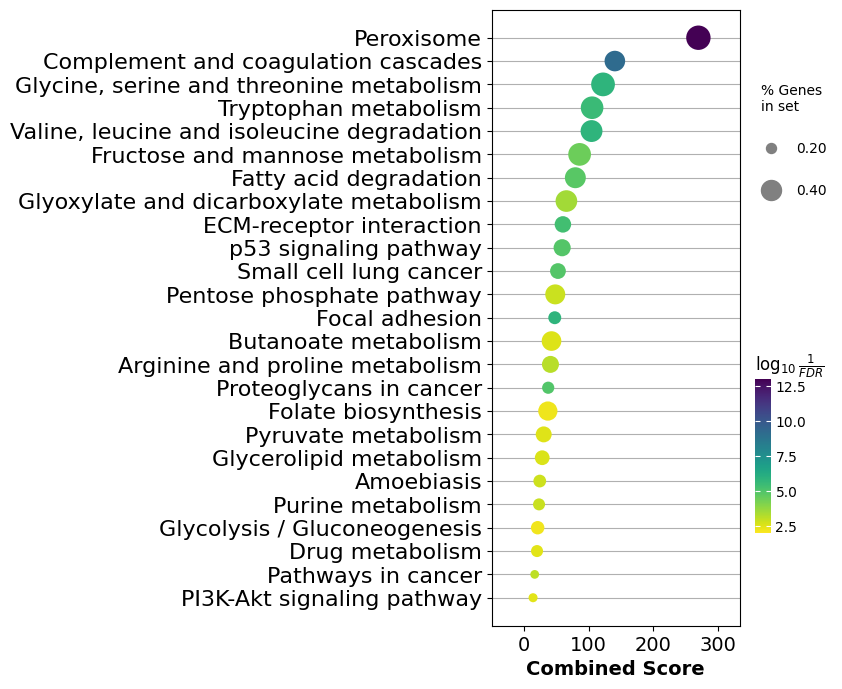

In [14]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
gene_sets = ["KEGG_2021_Human"]

enr = gp.enrichr(gene_list=gene_list, 
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

# obj.results stores all results
# enr.results.head()

ax = dotplot(enr.res2d,cmap='viridis_r', size=6, figsize=(4,8), top_term=25)

### GO_Biological_Process_2023

/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


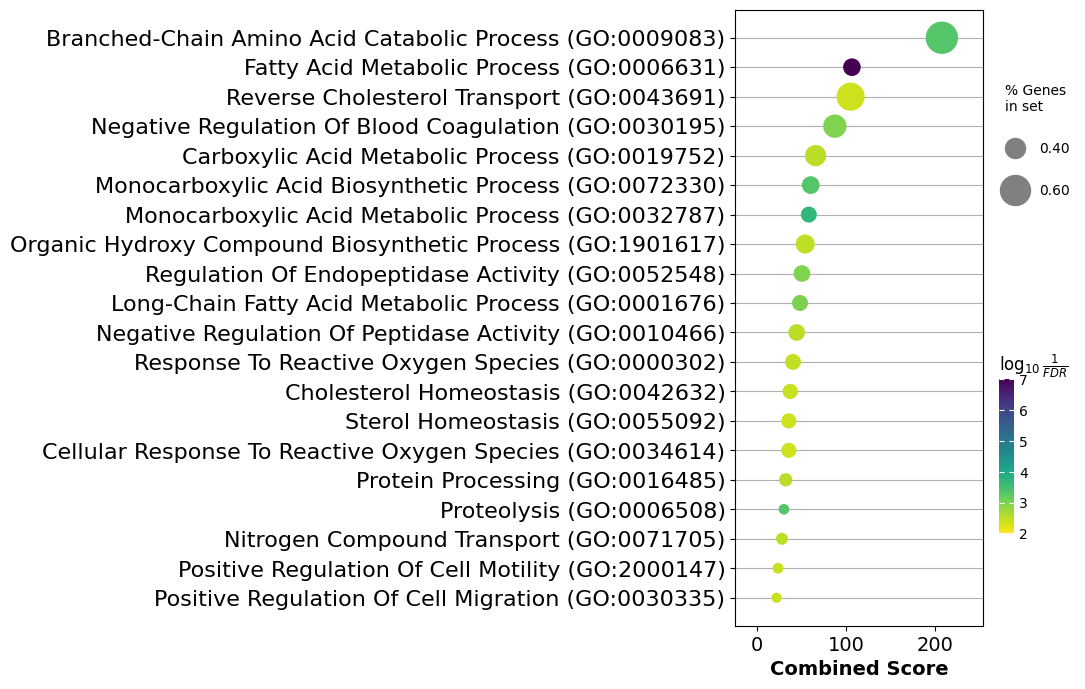

In [9]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
gene_sets = ["GO_Biological_Process_2023"]

enr = gp.enrichr(gene_list=gene_list, 
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

# obj.results stores all results
# enr.results.head()

ax = dotplot(enr.res2d,cmap='viridis_r', size=6, figsize=(4,8), top_term=20)

### GO_Molecular_Function_2023

/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


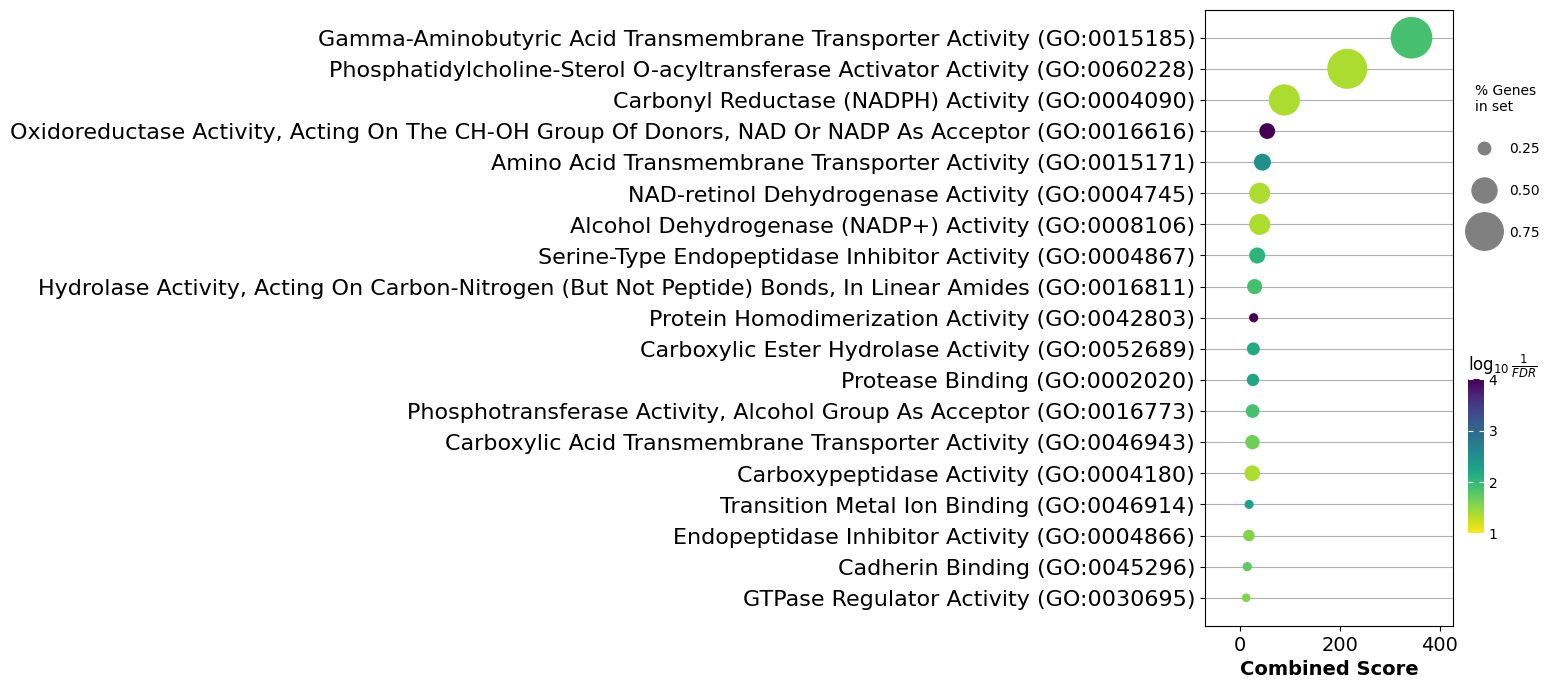

In [10]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
gene_sets = ["GO_Molecular_Function_2023"]

enr = gp.enrichr(gene_list=gene_list, 
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

# obj.results stores all results
# enr.results.head()

ax = dotplot(enr.res2d,cmap='viridis_r', size=6, figsize=(4,8), top_term=20)

### MSigDB_Hallmark_2020

/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


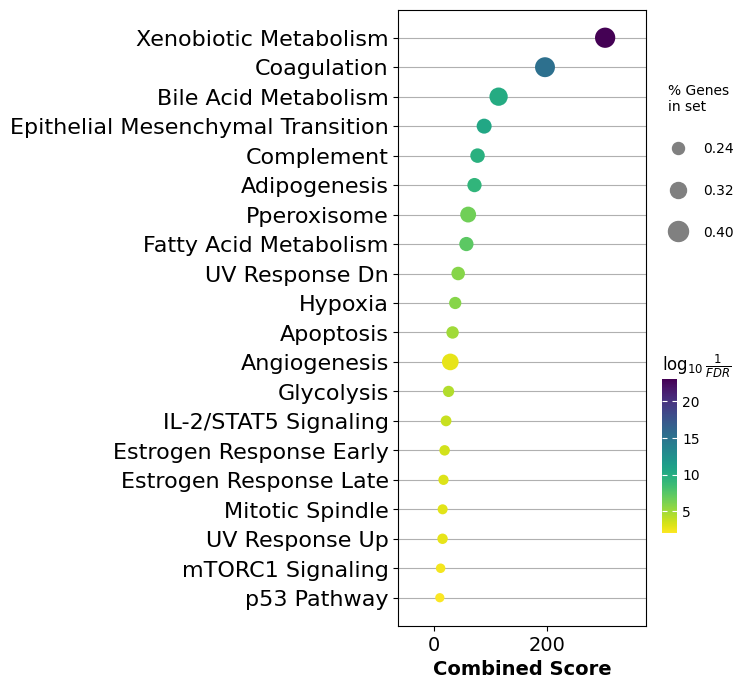

In [23]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
gene_sets = ["MSigDB_Hallmark_2020"]

enr = gp.enrichr(gene_list=gene_list, 
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

# obj.results stores all results
# enr.results.head()

ax = dotplot(enr.res2d,cmap='viridis_r', size=6, figsize=(4,8), top_term=20)

## Network graph

In [24]:
# return two dataframe
nodes, edges = enrichment_map(enr.res2d)

# build graph
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


/opt/anaconda3/envs/compbio/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


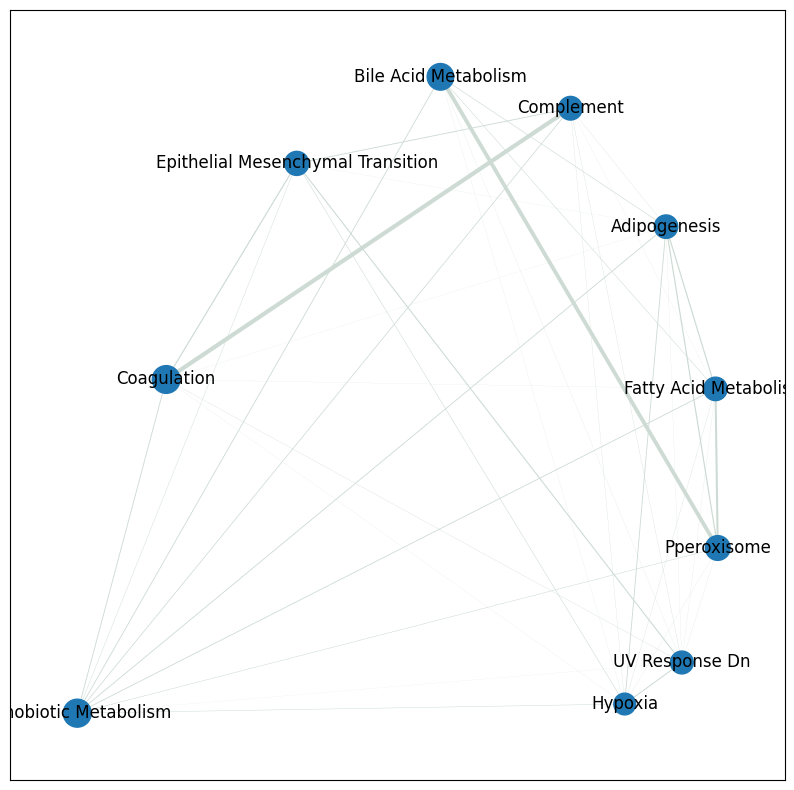

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       # node_color=list(nodes.NES),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.show()


## Some Notes

* Overall the KEGG pathway analysis result is very similar to the paper, both with the 2016 data library and 2021 data library. The orders of pathways between this analysis and the paper are very different. But there were no actual new pathways or new categories of pathways enriched. 

* For KEGG pathways, the main thing that jumps out to me is that there are lots of amino acids metabolism related pathways and processes. Then immune-related studies have confirmed that amino acid metabolism regulates the function of effector T cells and regulatory T cells [ref](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2869104/). Also there is the complement activation, p53, and pi3k-akt signaling pathway. So all these seem to suggest that it is doing immune response to HPV3 virus (or even liver cancer) and thus might be masking the results for pure fatty liver fibrosis reaction.

* Another category of pathways include peroxisom (lipid metabolism), fatty acid metabolism, and reverse cholesterol transport, and they seems to be some direct pathways for regulating fibrosis progression to look into further. 

* To understand better how are these pathways affected, one needs to check further on which directions those pathway related genes are regulated.